# Métodos autoregresivos para series de tiempo

In [1]:
#!pip3 install --upgrade statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar el módulo estadístico para series de tiempo
import statsmodels

In [4]:
statsmodels.__version__

'0.12.2'

In [5]:
# Cargar los datos
url='https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%209/Datasets/us_airline_carrier_passenger.csv'
df = pd.read_csv(url)
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [7]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


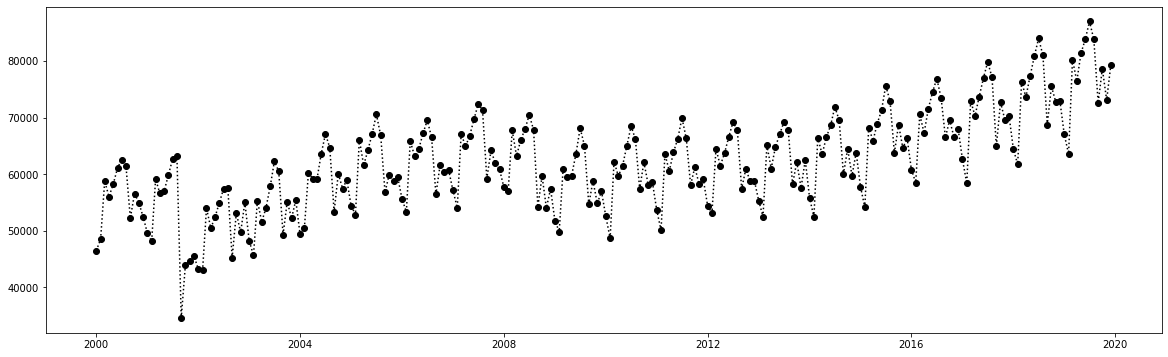

In [10]:
# Visualizar la serie de datos
plt.figure(figsize=(20,6))
plt.plot(df['month'],df['passengers'],'o:', color='black')

## Crear los datos de entrenamiento y validación
- Datos de entrenamiento: Fechas menores o iguales a Diciembre de 2016
- Validación: Fechas posteriores a Diciembre de 2016

In [12]:
import datetime

In [13]:
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01',"%Y-%m-%d")]
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01',"%Y-%m-%d")]

In [14]:
df_train.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [15]:
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


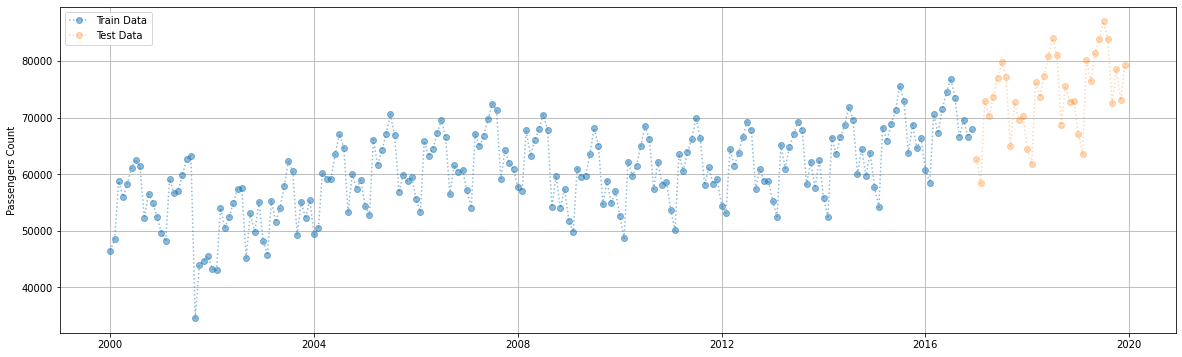

In [16]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)

plt.legend(['Train Data','Test Data'])
plt.ylabel('Passengers Count')
plt.grid()
plt.show()

### **ACF and PACF**
La autocorrelación en series temporales es un término estadístico que se utiliza para describir la presencia o ausencia de correlación en los datos de las series temporales, indicando, si las observaciones pasadas influyen en las actuales.

Por tanto, se puede decir que la autocorrelación hace referencia cuando los valores que toman una variable en el tiempo no son independientes entre sí, sino que un valor determinado depende de los valores anteriores.

El problema de la autocorrelación se denomina también frecuentemente de “correlación serial”.

Para medir la autocorrelación se suele usar:

- La función de autocorrelación
- La función de autocorrelación parcial

**La función de autocorrelación (ACF)**

Mide la correlación entre dos variables separadas por k periodos. Mide el grado de asociación lineal que existe entre dos variables del mismo proceso estocástico.

**La función de autocorrelación parcial (PACF)**

Mide la correlación entre dos variables separadas por k periodos cuando no se considera la dependencia creada por los retardos intermedios existentes entre ambas. Mide la autocorrelación que existe entre dos variables separadas k períodos descontando los posibles efectos debidos a variables intermedias.

La función ACF es usada para identificar el proceso de media móvil (MA) en un modelo ARIMA; mientras que la función PACF se usa para identificar los valores de la parte del proceso autoregresivo (AR).

Los gráficos generados a partir de estas funciones se denominan correlogramas, los cuales contienen bandas con un intervalo de confianza del 95%.

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 0, 'Lags')

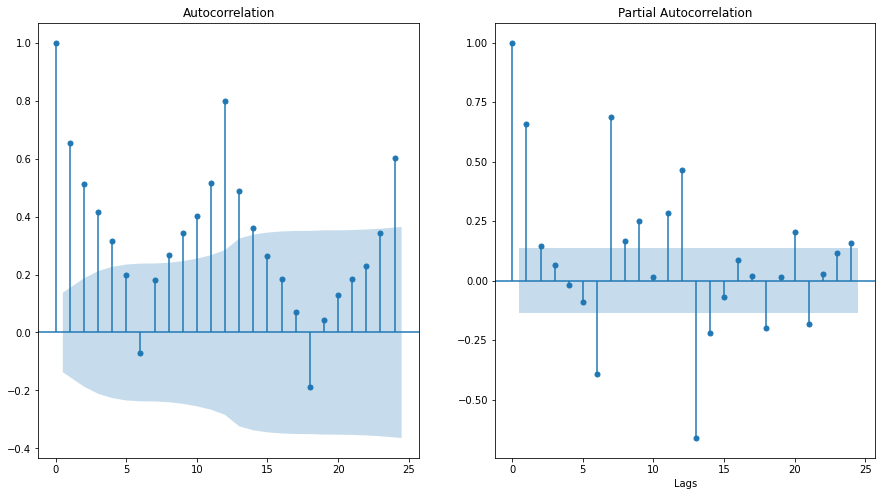

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
res1 = plot_acf(df_train['passengers'],ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(df_train['passengers'],ax=ax[1])
plt.xlabel('Lags')

**Making Data Stationary**

In [38]:
difference = df_train['passengers'].diff()

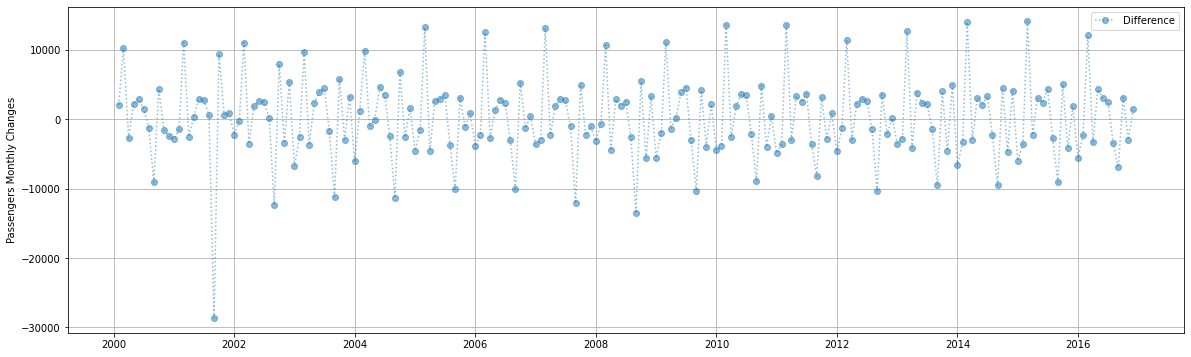

In [39]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'],difference,'o:',alpha=0.5)

plt.legend(['Difference'])
plt.ylabel('Passengers Monthly Changes')
plt.grid()
plt.show()

In [41]:
difference.dropna(inplace=True) # drop the missing before computing ACF and PACF

Text(0.5, 0, 'Lags')

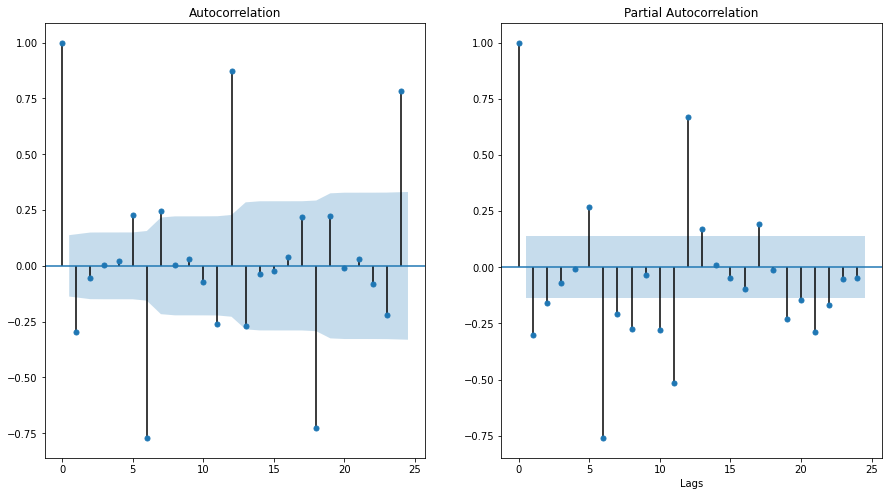

In [42]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
res1 = plot_acf(difference,ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(difference,ax=ax[1])
plt.xlabel('Lags')

> **Clear Seasonality at 12 periods**

## Auto Regressive Model
- AR (p)

p = number of lags
- find p using PACF (find the number of lags which are not zero)

- 12 lags from PACF

AR(12)

In [45]:
x_train = df_train.set_index('month')
x_test = df_test.set_index('month')

In [46]:
from statsmodels.tsa.ar_model import AutoReg

In [47]:
model_ar = AutoReg(x_train,lags=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [48]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:             passengers   No. Observations:                  204
Model:                    AutoReg(12)   Log Likelihood               -1791.208
Method:               Conditional MLE   S.D. of innovations           2725.128
Date:                Mon, 21 Dec 2020   AIC                             15.966
Time:                        17:04:53   BIC                             16.204
Sample:                    01-01-2001   HQIC                            16.063
                         - 12-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept      -1101.8877   2670.461     -0.413      0.680   -6335.894    4132.119
passengers.L1      0.4234      0.062      6.848      0.000       0.302       0.545
passengers.L2      0.0487      0.069

In [49]:
# fitted values
fittedvalues = model_ar.fittedvalues

In [50]:
fittedvalues.head()

month
2001-01-01    49334.710929
2001-02-01    49964.903006
2001-03-01    57480.606603
2001-04-01    55642.948449
2001-05-01    57963.182409
dtype: float64

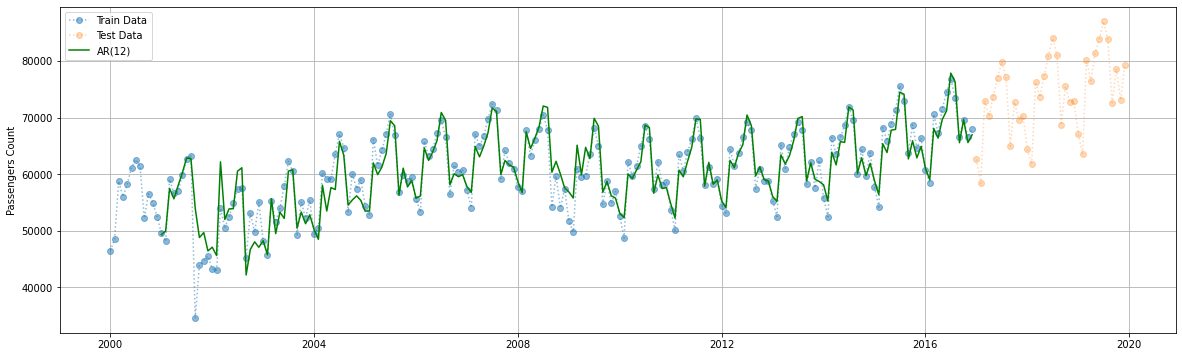

In [52]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)
# fitted values
plt.plot(fittedvalues,'g-')

plt.legend(['Train Data','Test Data','AR(12)'])
plt.ylabel('Passengers Count')
plt.grid()
plt.show()

In [53]:
start = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
end = datetime.datetime.strptime('2019-12-01','%Y-%m-%d')
forecast_values = model_ar.predict(start,end)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [55]:
forecast_values.head(3)

2017-01-01    63865.557371
2017-02-01    63222.994100
2017-03-01    70781.913370
Freq: MS, dtype: float64

In [58]:
ME = 1.96 * model_ar.resid.std()

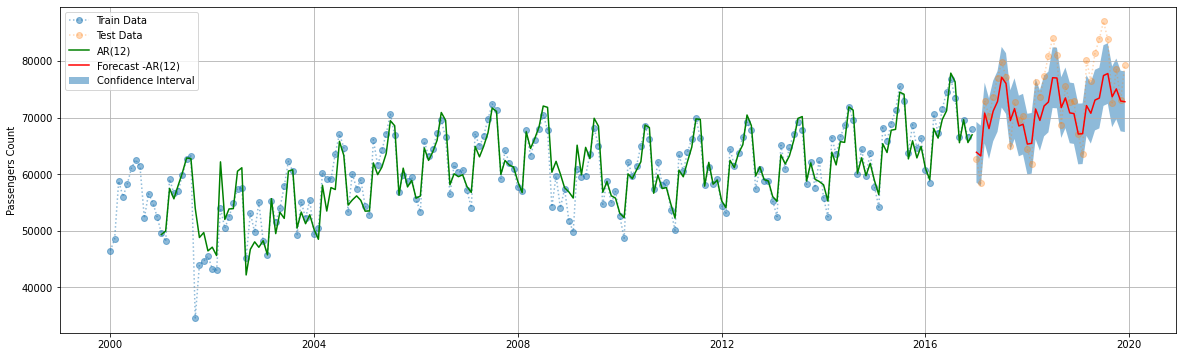

In [61]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'],df_train['passengers'],'o:',alpha=0.5)
plt.plot(df_test['month'],df_test['passengers'],'o:',alpha=0.3)
# fitted values
plt.plot(fittedvalues,'g-')
# forecasted values
plt.plot(forecast_values,'r-')
# confidence
plt.fill_between(df_test['month'],(forecast_values.values+ME),((forecast_values.values-ME)),alpha=0.5)

plt.legend(['Train Data','Test Data','AR(12)','Forecast -AR(12)','Confidence Interval'])
plt.ylabel('Passengers Count')
plt.grid()
plt.show()

**Evaluation**

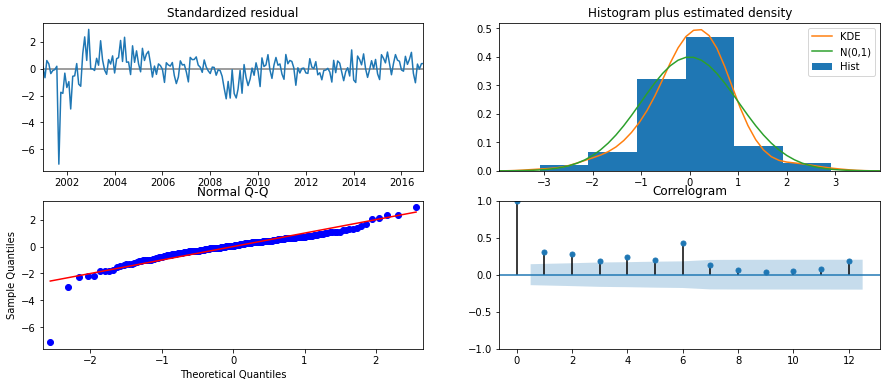

In [64]:
fig = plt.figure(figsize=(15,6))
fig =model_ar.plot_diagnostics(lags=12,fig=fig)